In [38]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

print(f"The shape of the dataset is {df.shape}")
if df.isnull().any().any():
  print(f"There are missing values in the dataset")
else:
  print(f"There are no missing values in the dataset")

from pandas.api.types import is_numeric_dtype
df = df.apply(lambda x: x.fillna(x.median()) if is_numeric_dtype(x) else x.fillna(x.mode().iloc[0]))

df.head()

The shape of the dataset is (178, 13)
There are no missing values in the dataset


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [39]:
X = df.iloc[:, 1:len(df.columns)]
y = df.iloc[:, 0]

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=1337
)

def fit(model, X_train, y_train):
  model.fit(X_train, y_train)

def predictions(model, X_test):
  return model.predict(X_test)

def evaluate(true_values, predicted_values):
  print(f"Mean Squared Error (MSE) = {mean_squared_error(true_values, predicted_values)}")

def print_regression_coefficients(model, columns):
  print(f"Regression coefficients: ")
  for i in range(0, len(columns)): print(f"{columns[i].strip():.2f}")

def plot_true_vs_predicted(y_true, y_predicted):
  fig, ax = plt.subplots()
  ax.scatter(y_true, y_predicted, edgecolors=(0,0,0), color="red")
  ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "k--", lw=4)
  ax.set_xlabel("True alcohol")
  ax.set_ylabel("Predicted alcohol")

***** evaluate predictions on the test set
Mean Squared Error (MSE) = 0.325070511679702


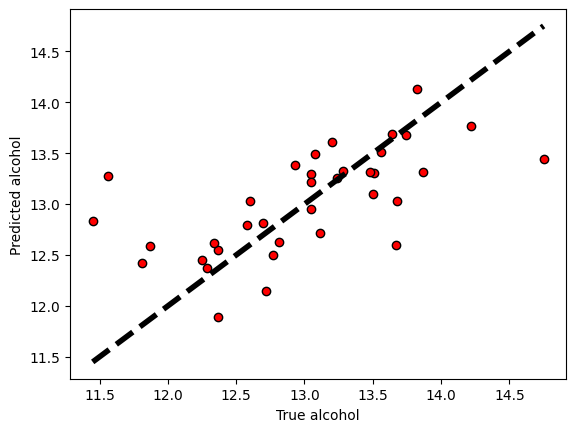

In [41]:
# create linear regression object
from sklearn import linear_model
model = linear_model.LinearRegression()

fit(model, X_train, y_train)

print("***** evaluate predictions on the test set")
mpg_y_test_pred = model.predict(X_test)
evaluate(y_test, mpg_y_test_pred)
plot_true_vs_predicted(y_test, mpg_y_test_pred)